In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS
import scikitplot as skplt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
dataset = pd.read_csv('Sentiment Analysis data.csv')

# Data Cleaning

In [23]:
# Remove duplicates
dataset.drop_duplicates(subset='reviews.text_reduce', inplace=True)

# Checking for null values

In [24]:
print("Null values before handling:\n", dataset.isnull().sum())

Null values before handling:
 Unnamed: 0             0
brand                  0
categories             0
manufacturer           0
reviews.rating         0
reviews.text           0
label                  0
reviews.text_reduce    0
dtype: int64


In [25]:
# Remove rows with remaining null values
dataset.dropna(inplace=True)

# Normalize text

In [26]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [27]:
dataset['reviews.text_reduce'] = dataset['reviews.text_reduce'].apply(clean_text)

# Remove stopwords and apply stemming 

In [28]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [29]:
def preprocess_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

In [30]:
dataset['reviews.text_reduce'] = dataset['reviews.text_reduce'].apply(preprocess_text)

# Basic data overview 

In [31]:
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
Index: 64769 entries, 0 to 70866
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           64769 non-null  int64 
 1   brand                64769 non-null  object
 2   categories           64769 non-null  object
 3   manufacturer         64769 non-null  object
 4   reviews.rating       64769 non-null  int64 
 5   reviews.text         64769 non-null  object
 6   label                64769 non-null  object
 7   reviews.text_reduce  64769 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.4+ MB
None
   Unnamed: 0            brand  \
0           0  Universal Music   
1           1         Lundberg   
2           2         Lundberg   
3           3              K-Y   
4           4              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crack

# Check class balance

In [32]:
print(dataset['label'].value_counts())

label
positive    56803
negative     7966
Name: count, dtype: int64


# Data preprocessing

In [33]:
X = dataset['reviews.text_reduce']
y = dataset['label']

# Splitting the dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization

In [35]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model training using SGD Classifier

In [36]:
# SGDClassifier is a linear classifier optimized with stochastic gradient descent, suitable for large datasets
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_tfidf, y_train)

SGDClassifier(random_state=42)

# Predictions and Evaluation for SGD Classifier

In [37]:
# SGD Metric Over Training: Evaluating model performance on training data
sgd_train_pred = sgd_model.predict(X_train_tfidf)
print("SGD Classifier Training Accuracy:", accuracy_score(y_train, sgd_train_pred))
print("SGD Classifier Training Classification Report:\n", classification_report(y_train, sgd_train_pred))

SGD Classifier Training Accuracy: 0.8924249734632829
SGD Classifier Training Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.14      0.25      6413
    positive       0.89      1.00      0.94     45402

    accuracy                           0.89     51815
   macro avg       0.91      0.57      0.60     51815
weighted avg       0.90      0.89      0.86     51815



# SGD Metric Over Test

In [38]:
#Evaluating model performance on test data
sgd_test_pred = sgd_model.predict(X_test_tfidf)
print("SGD Classifier Test Accuracy:", accuracy_score(y_test, sgd_test_pred))
print("SGD Classifier Test Classification Report:\n", classification_report(y_test, sgd_test_pred))

SGD Classifier Test Accuracy: 0.8947815346611085
SGD Classifier Test Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.14      0.24      1553
    positive       0.89      1.00      0.94     11401

    accuracy                           0.89     12954
   macro avg       0.90      0.57      0.59     12954
weighted avg       0.90      0.89      0.86     12954



# Visualizing SGD Classifier results 

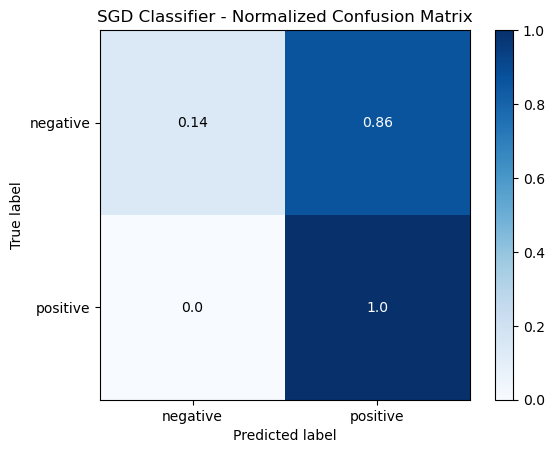

In [39]:
skplt.metrics.plot_confusion_matrix(y_test, sgd_test_pred, normalize=True)
plt.title('SGD Classifier - Normalized Confusion Matrix')
plt.show()

# General WordCloud function

In [40]:
stopwords = set(STOPWORDS)

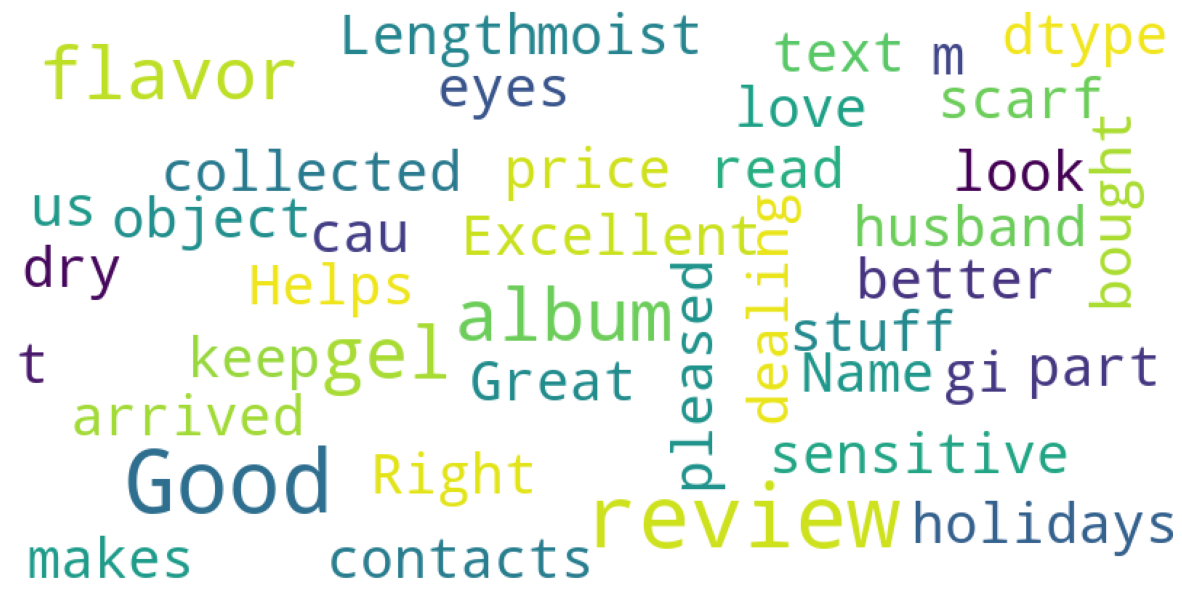

In [57]:
stopwords = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(dataset['reviews.text'])

# Review Ratings Distribution

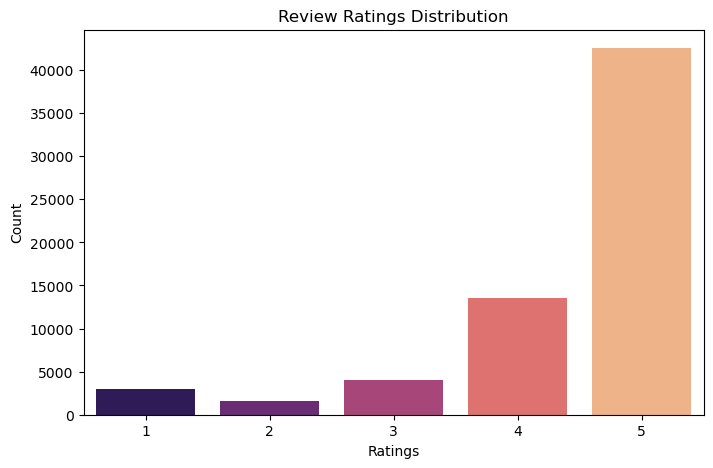

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(x='reviews.rating', data=dataset, palette='magma')
plt.title('Review Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [74]:
# Simulated Fake Reviews Provided by User using 'reviews.rating'
dataset['is_fake_review'] = dataset['reviews.text_reduce'].isnull() | (dataset['reviews.rating'] <= 2)

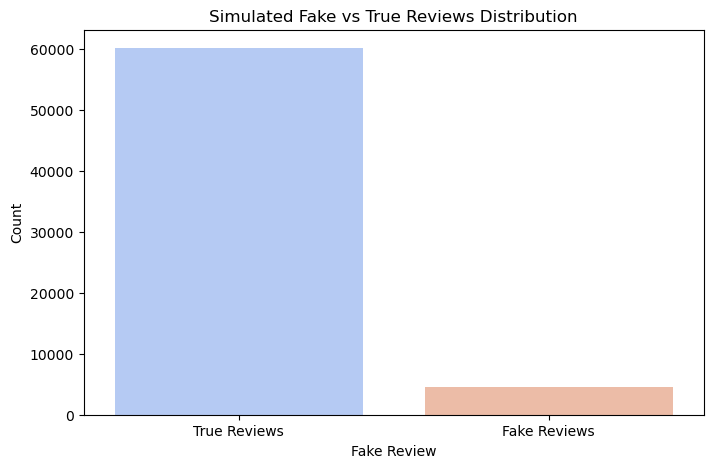

In [75]:
# Count of simulated fake vs true reviews
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fake_review', data=dataset, palette='coolwarm')
plt.title('Simulated Fake vs True Reviews Distribution')
plt.xlabel('Fake Review')
plt.ylabel('Count')
plt.xticks([0, 1], ['True Reviews', 'Fake Reviews'])
plt.show()

In [76]:
# Print observation
print("True reviews are less in number. People who gave low ratings or no comments are considered fake. These simulated fake reviews are significantly higher than those considered true.")

True reviews are less in number. People who gave low ratings or no comments are considered fake. These simulated fake reviews are significantly higher than those considered true.


In [77]:
# Final Observation
print("The analysis reveals a noticeable imbalance between true and fake reviews. Many users who provided low ratings or left no comments are identified as contributing fake reviews. This significant disparity highlights the importance of filtering out unreliable feedback for accurate sentiment analysis.")


The analysis reveals a noticeable imbalance between true and fake reviews. Many users who provided low ratings or left no comments are identified as contributing fake reviews. This significant disparity highlights the importance of filtering out unreliable feedback for accurate sentiment analysis.
